In [1]:
# data_prep.py

import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
data = Path.cwd().resolve().parents[0] / "data" 
df = pd.DataFrame()

In [4]:
FILES = list(data.glob("*.csv"))
print(f'total files found: {len(FILES)}')
for file in FILES:
    df_ = pd.read_csv(str(file), parse_dates=["Date"])
    df_['Date'] = pd.to_datetime(df_["Date"])
    df =  df.append(df_)
    df.sort_values(by="Date", inplace=True)
    df.drop_duplicates(inplace=True)

total files found: 5


In [5]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2017-01-02,18242.30,18249.00,17844.90,17969.60,74444730,1857.24
1,2017-01-03,18002.75,18115.05,17830.95,18035.60,64513818,1769.30
2,2017-01-04,18037.45,18092.85,17868.90,17891.00,50508161,1615.85
3,2017-01-05,18000.75,18164.05,17977.80,18115.95,68874940,2271.18
4,2017-01-06,18168.45,18325.50,18157.30,18264.00,65919927,2174.59


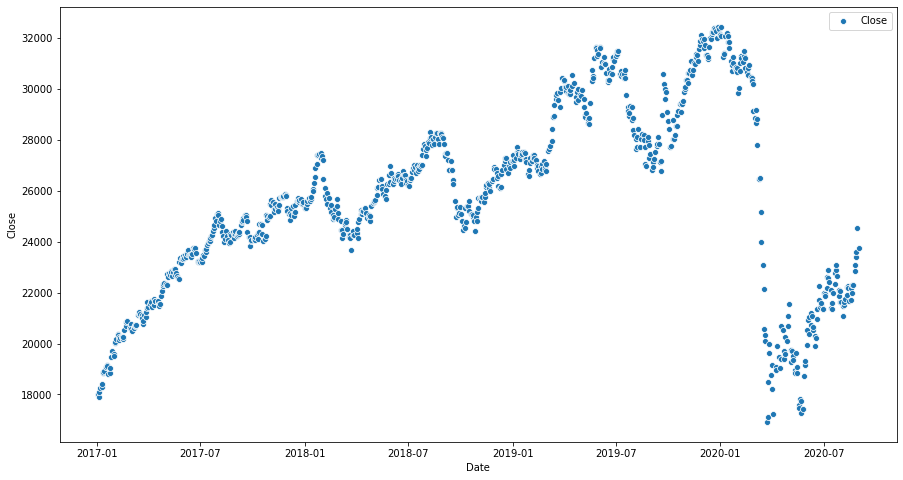

In [6]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df.Date, y=df.Close, label="Close", markers="o")
plt.legend()
plt.show()

In [6]:
df.shape

(906, 7)

In [7]:
df.sort_values(by="Date")

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2017-01-02,18242.30,18249.00,17844.90,17969.60,74444730,1857.24
1,2017-01-03,18002.75,18115.05,17830.95,18035.60,64513818,1769.30
2,2017-01-04,18037.45,18092.85,17868.90,17891.00,50508161,1615.85
3,2017-01-05,18000.75,18164.05,17977.80,18115.95,68874940,2271.18
4,2017-01-06,18168.45,18325.50,18157.30,18264.00,65919927,2174.59
...,...,...,...,...,...,...,...
162,2020-08-25,22973.40,23180.30,22857.90,23092.15,422190044,10281.9
163,2020-08-26,23175.55,23453.40,23093.15,23414.20,337920632,9538.81
164,2020-08-27,23511.45,23704.05,23464.15,23600.35,430926732,11647.7
165,2020-08-28,23635.30,24611.80,23599.20,24523.80,812646625,19923.7


In [8]:
for lag in range(9):
    df["lag"+str(lag+1)] = df["Close"].shift(lag+1)

In [9]:
df.iloc[:, 7:].dropna(inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9
9,2017-01-13,18949.70,18952.25,18781.25,18912.10,55762182,1855.30,18873.95,18830.00,18409.60,18286.65,18264.00,18115.95,17891.00,18035.60,17969.60
10,2017-01-16,18899.70,19134.50,18865.25,19096.45,59319825,1740.77,18912.10,18873.95,18830.00,18409.60,18286.65,18264.00,18115.95,17891.00,18035.60
11,2017-01-17,19128.15,19202.25,18981.85,19067.05,63686033,1862.62,19096.45,18912.10,18873.95,18830.00,18409.60,18286.65,18264.00,18115.95,17891.00
12,2017-01-18,19074.85,19276.50,19072.10,19164.50,56898977,1871.38,19067.05,19096.45,18912.10,18873.95,18830.00,18409.60,18286.65,18264.00,18115.95
13,2017-01-19,19165.35,19185.30,19046.10,19124.25,83679399,2409.78,19164.50,19067.05,19096.45,18912.10,18873.95,18830.00,18409.60,18286.65,18264.00
14,2017-01-20,18996.60,19071.65,18793.05,18820.80,110140976,3855.90,19124.25,19164.50,19067.05,19096.45,18912.10,18873.95,18830.00,18409.60,18286.65
15,2017-01-23,18762.00,18909.65,18722.85,18842.70,97144867,3232.45,18820.80,19124.25,19164.50,19067.05,19096.45,18912.10,18873.95,18830.00,18409.60
16,2017-01-24,18931.00,19054.30,18906.95,19023.50,81717037,3118.62,18842.70,18820.80,19124.25,19164.50,19067.05,19096.45,18912.10,18873.95,18830.00
17,2017-01-25,19120.05,19518.45,19114.15,19473.20,131028002,4672.67,19023.50,18842.70,18820.80,19124.25,19164.50,19067.05,19096.45,18912.10,18873.95
18,2017-01-27,19588.40,19794.95,19534.90,19708.30,157251635,4654.79,19473.20,19023.50,18842.70,18820.80,19124.25,19164.50,19067.05,19096.45,18912.10


In [13]:
df.Date.min(), df.Date.max()

(Timestamp('2017-01-13 00:00:00'), Timestamp('2020-08-31 00:00:00'))

In [14]:
feat = df.iloc[:, 7:].values
mn = MinMaxScaler(feature_range=(0, 1))
features = mn.fit_transform(feat) 
target = df.Close.values

In [15]:
features.shape, target.shape

((897, 9), (897,))

In [16]:
train_len = int(features.shape[0] * 0.95)
train_feat = features[:train_len]
train_target = df.Close.values[:train_len]
val_feat = features[train_len:]
val_target = df.Close.values[train_len:]

In [17]:
train_feat.shape, train_target.shape, val_feat.shape, val_target.shape

((852, 9), (852,), (45, 9), (45,))

In [18]:
train_feat = train_feat.reshape((train_feat.shape[0], 1, train_feat.shape[1]))
train_target  = train_target.reshape((-1, 1))
val_feat = val_feat.reshape((val_feat.shape[0], 1, val_feat.shape[1]))
val_target = val_target.reshape((-1, 1))
train_feat.shape, train_target.shape, val_feat.shape, val_target.shape

((852, 1, 9), (852, 1), (45, 1, 9), (45, 1))

In [19]:
model = tf.keras.Sequential()
model.add(LSTM(50 , activation="relu", input_shape=(1,train_feat.shape[2]), return_sequences=True))
model.add(LSTM(50, activation="relu", return_sequences=True))
model.add(LSTM(50, activation="relu", return_sequences=True))
model.add(LSTM(50, activation="relu", return_sequences=True))
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam" , loss="mae", metrics=["mae"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             12000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0
____________________________________________________

In [20]:
cb = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
history = model.fit(x=train_feat,
          y=train_target,
            batch_size=32,
         validation_data=(val_feat, val_target),
          epochs=100,
#         callbacks=[cb]
         )

Epoch 1/100
27/27 [==============================] - 2s 57ms/step - loss: 25985.7090 - mae: 25985.7090 - val_loss: 22238.1074 - val_mae: 22238.1074
Epoch 2/100
27/27 [==============================] - 0s 10ms/step - loss: 25985.6406 - mae: 25985.6406 - val_loss: 22238.0020 - val_mae: 22238.0020
Epoch 3/100
27/27 [==============================] - 0s 10ms/step - loss: 25984.7109 - mae: 25984.7109 - val_loss: 22237.0645 - val_mae: 22237.0645
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 25858.1543 - mae: 25858.1543 - val_loss: 22107.3945 - val_mae: 22107.3945
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 24256.6504 - mae: 24256.6504 - val_loss: 20417.7305 - val_mae: 20417.7305
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 15380.8203 - mae: 15380.8203 - val_loss: 11645.2559 - val_mae: 11645.2559
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 6490.6851 - mae: 6490.6851 - val_loss: 10

27/27 [==============================] - 0s 10ms/step - loss: 389.9220 - mae: 389.9220 - val_loss: 431.1999 - val_mae: 431.1999
Epoch 59/100
27/27 [==============================] - 0s 10ms/step - loss: 380.2580 - mae: 380.2580 - val_loss: 434.1148 - val_mae: 434.1148
Epoch 60/100
27/27 [==============================] - 0s 10ms/step - loss: 386.7654 - mae: 386.7654 - val_loss: 423.5656 - val_mae: 423.5656
Epoch 61/100
27/27 [==============================] - 0s 10ms/step - loss: 369.8303 - mae: 369.8303 - val_loss: 416.1285 - val_mae: 416.1285
Epoch 62/100
27/27 [==============================] - 0s 9ms/step - loss: 378.3777 - mae: 378.3777 - val_loss: 413.1392 - val_mae: 413.1392
Epoch 63/100
27/27 [==============================] - 0s 9ms/step - loss: 379.2798 - mae: 379.2798 - val_loss: 410.6776 - val_mae: 410.6776
Epoch 64/100
27/27 [==============================] - 0s 9ms/step - loss: 360.6638 - mae: 360.6638 - val_loss: 410.8605 - val_mae: 410.8605
Epoch 65/100
27/27 [=========

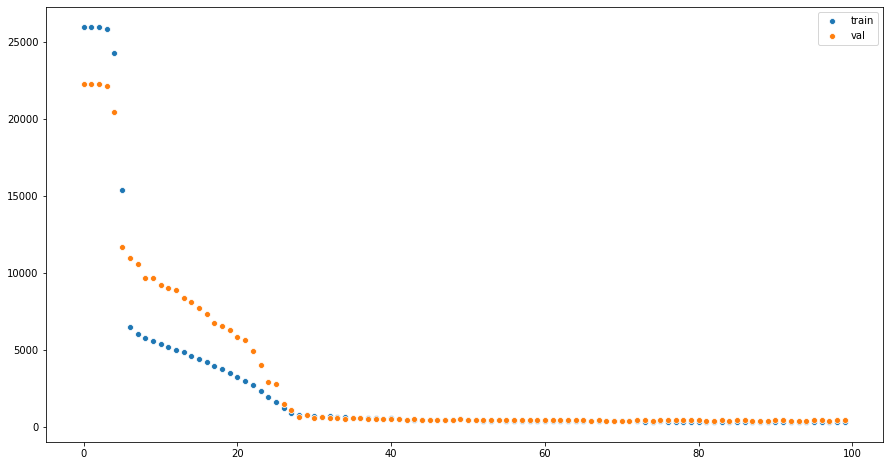

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=history.history["loss"], x=range(len(history.history["loss"])), label="train")
sns.scatterplot(y=history.history["val_loss"], x=range(len(history.history["loss"])), label="val")
plt.legend()
plt.show()

In [70]:
model.save("model.h5")

In [22]:
predictions = model.predict(val_feat)

In [23]:
date = pd.date_range(end="2020-08-31", freq="D", periods=predictions.shape[0])

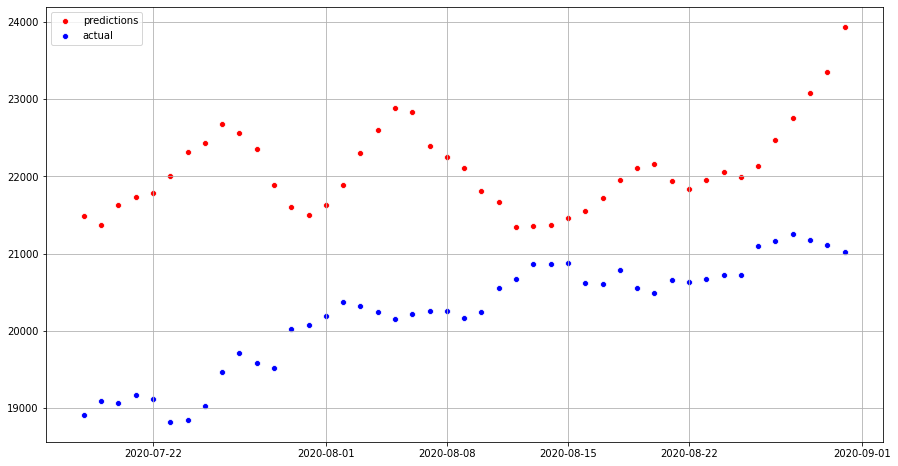

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=predictions.reshape((-1)).tolist(), x=date , label="predictions", color="red", markers="o")
sns.scatterplot(y=train_target.reshape((-1)).tolist()[:len(date)], x=date, label="actual", color="blue")
plt.legend()
plt.grid()
plt.show()


In [25]:
mean_squared_error(y_pred=predictions.reshape((-1)).tolist(), y_true=val_target)

244112.0286398383

In [26]:
mean_absolute_error(y_pred=predictions.reshape((-1)).tolist(), y_true=val_target)


421.2224826388889

## 2nd Try

In [58]:
model = tf.keras.Sequential()
model.add(LSTM(50 , activation="relu", input_shape=(1,train_feat.shape[2])))
model.add(LSTM(50, activation="relu"))
model.add(LSTM(50, activation="relu"))
model.add(LSTM(50, activation="relu"))
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam" , loss="mae", metrics=["mae"])
model.summary()

ValueError: Input 0 of layer lstm_24 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 50]